<a href="https://colab.research.google.com/github/milind69/milind69/blob/main/plant_seedlings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Objective**
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

#### **Dataset:**

The data file names are:

- images.npy - which contains the array of images
- Label.csv  - Lables for each image 

In [41]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from sklearn.model_selection import train_test_split
print("Setup Done")

Setup Done


In [42]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### **Reading the DataSet**

In [43]:
# Read the data file 
images=np.load('/content/drive/MyDrive/Colab Notebooks/images.npy')
plant_seedlings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Labels.csv')
#images=np.load('images.npy')
#plant_seedlings = pd.read_csv('Labels.csv')
labels = plant_seedlings['Label']
# get #of classes
classes = list(np.unique(labels))
print("There are %d classes in the dataset" % len(classes))

There are 12 classes in the dataset


In [44]:
print("Indexed list of classes")
_=[print(f'{x} - {classes[x]}') for x in range(len(classes))]


Indexed list of classes
0 - Black-grass
1 - Charlock
2 - Cleavers
3 - Common Chickweed
4 - Common wheat
5 - Fat Hen
6 - Loose Silky-bent
7 - Maize
8 - Scentless Mayweed
9 - Shepherds Purse
10 - Small-flowered Cranesbill
11 - Sugar beet


In [45]:
#plant_seedlings['images'] = images.tolist()
#plant_seedlings['class_num']=[classes.index(x) for x in plant_seedlings['Label']]
#plant_seedlings.head()
#plant_seedlings['Label'].value_counts()

In [46]:
plant_seedlings['Label'].value_counts().sort_values()

Common wheat                 221
Maize                        221
Shepherds Purse              231
Black-grass                  263
Cleavers                     287
Sugar beet                   385
Charlock                     390
Fat Hen                      475
Small-flowered Cranesbill    496
Scentless Mayweed            516
Common Chickweed             611
Loose Silky-bent             654
Name: Label, dtype: int64

In [47]:
# Build List of List containing HSV image and numberical class value 
seedlings_data = []
grayhsv_data =[]
scale = 128
for image,label in (list(zip(images,labels))):
  try:  
    image=cv2.resize(image,(scale,scale))
    grayimg=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    blurr = cv2.GaussianBlur(image,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    grayhsv = cv2.cvtColor(hsv,cv2.COLOR_BGR2GRAY)
    class_num=classes.index(label)
    seedlings_data.append([(image,hsv),class_num])
    grayhsv_data.append([(grayimg,grayhsv),class_num])
  except:
    pass


### **Exploratory Data Analysis**

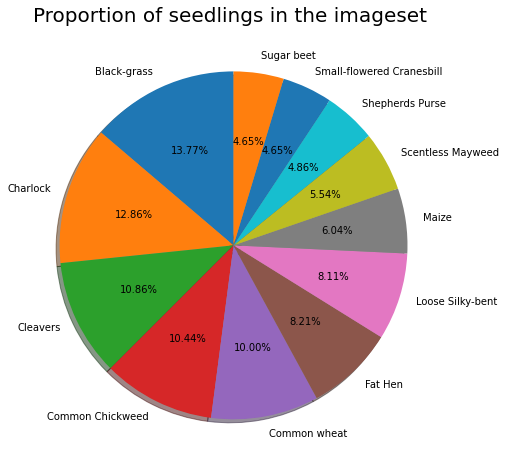

In [48]:
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1=plt.pie(plant_seedlings['Label'].value_counts(), labels=classes,shadow=True, autopct = lambda pct: '{:.2f}%'.format(pct),startangle=90)
plt.title("Proportion of seedlings in the imageset ", size = 20)
plt.show()


#### **Print Random Images from each class**

**Visualize images randomly from each of the three classes**. The Image matrix is plotted and each row represents two 3 channel images corresponding to one class.

In [49]:

imgx_0 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 0] 
labelx_0 = classes[0]
imgx_1 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 1] 
labelx_1 = classes[1]
imgx_2 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 2] 
labelx_2 = classes[2]

imgx_3 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 3] 
labelx_3 = classes[3]
imgx_4 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 4] 
labelx_4 = classes[4]
imgx_5 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 5] 
labelx_5 = classes[5]

imgx_6 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 6] 
labelx_6 = classes[6]
imgx_7 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 7] 
labelx_7 = classes[7]
imgx_8 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 8] 
labelx_8 = classes[8]

imgx_9 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 9] 
labelx_9 = classes[9]
imgx_10 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 10] 
labelx_10 = classes[10]
imgx_11 = [imgs[0] for imgs,clsnum in seedlings_data if clsnum == 11] 
labelx_11 = classes[11]

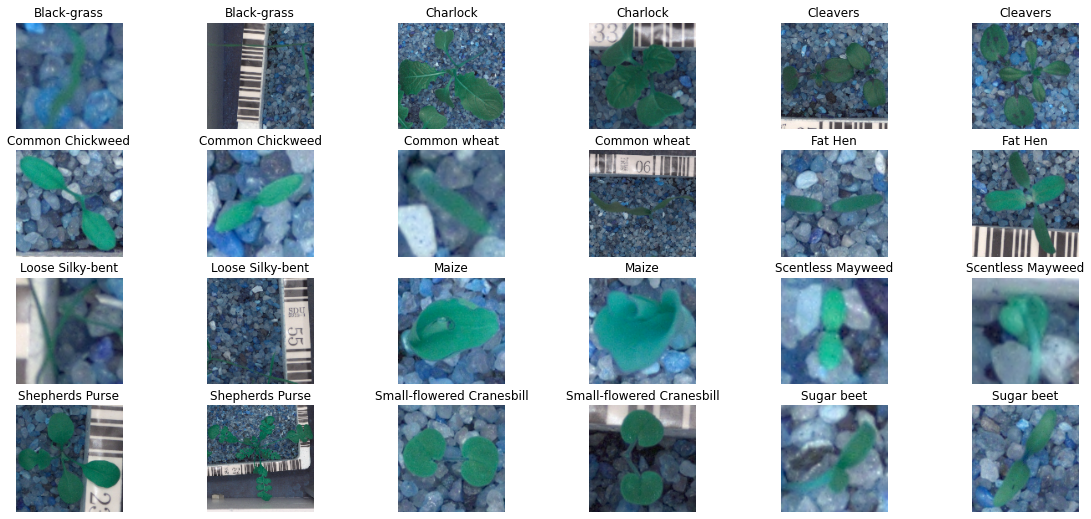

In [50]:
from tensorflow.keras.preprocessing import image
fig = plt.figure(figsize = (20,9))

for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+1)
    fn=image.array_to_img(imgx_0[np.random.randint(0,len(imgx_0))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_0)
    plt.axis('off')
    
for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+3)
    fn=image.array_to_img(imgx_1[np.random.randint(0,len(imgx_1))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_1)
    plt.axis('off')
    
for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+5)
    fn=image.array_to_img(imgx_2[np.random.randint(0,len(imgx_2))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_2)
    plt.axis('off')
    
for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+7)
    fn=image.array_to_img(imgx_3[np.random.randint(0,len(imgx_3))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_3)
    plt.axis('off')

for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+9)
    fn=image.array_to_img(imgx_4[np.random.randint(0,len(imgx_4))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_4)
    plt.axis('off')
    
for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+11)
    fn=image.array_to_img(imgx_5[np.random.randint(0,len(imgx_5))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_5)
    plt.axis('off')
    

for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+13)
    fn=image.array_to_img(imgx_6[np.random.randint(0,len(imgx_6))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_6)
    plt.axis('off')

for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+15)
    fn=image.array_to_img(imgx_7[np.random.randint(0,len(imgx_7))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_7)
    plt.axis('off')
    
for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+17)
    fn=image.array_to_img(imgx_8[np.random.randint(0,len(imgx_8))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_8)
    plt.axis('off')

for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+19)
    fn=image.array_to_img(imgx_9[np.random.randint(0,len(imgx_9))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_9)
    plt.axis('off')
    
for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+21)
    fn=image.array_to_img(imgx_10[np.random.randint(0,len(imgx_10))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_10)
    plt.axis('off')
    
for count in range(0,2):
    ax = fig.add_subplot(4, 6, count+23)
    fn=image.array_to_img(imgx_11[np.random.randint(0,len(imgx_11))])
    plt.imshow(fn, cmap='gray')
    plt.title(labelx_11)
    plt.axis('off')
plt.show()

#### Image Histogram
- Image Histograms shows the distribution on Pixel/Pixel Intensity in the images
- Histogram of an image provides a global description of the appearance of an image.
- Histogram of an image represents the relative frequency of occurence of various gray levels in an image.

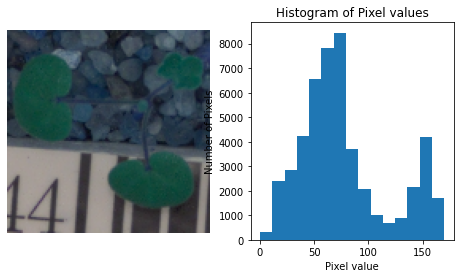

In [51]:
fig = plt.figure(figsize = (8,4))
i=seedlings_data[12][0][0]
fig.add_subplot(1,2,1)
plt.imshow(i)
plt.axis('off')
b=i.flatten()
#plt.figure(figsize=(4,4), edgecolor='red')
fig.add_subplot(1,2,2)
n, bins, patches = plt.hist(b, bins=15)
plt.xlabel('Pixel value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of Pixel values')
plt.show()

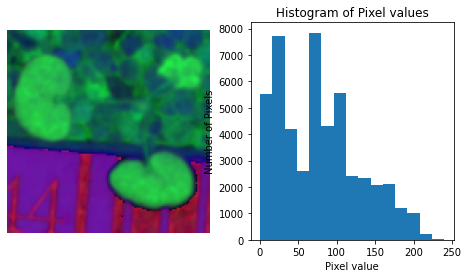

In [52]:
fig = plt.figure(figsize = (8,4))
i=seedlings_data[12][0][1]
fig.add_subplot(1,2,1)
plt.imshow(i)
plt.axis('off')
b=i.flatten()
#plt.figure(figsize=(4,4), edgecolor='red')
fig.add_subplot(1,2,2)
n, bins, patches = plt.hist(b, bins=15)
plt.xlabel('Pixel value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of Pixel values')
plt.show()

#### Observations:
There is case of class imbalance, the % of observations ranges from 13.7% as  high to 4.65% as low , this can bias the prediction towards majority class 

Sample Printing of images shows that the quality of images not very good and need to be cleaned up to remove the noise, which can be achieved by 

- Blurring  the images with Gaussian fliter
- Convert the RGB images into the HSV
- Histogram show higher pixed intensity due to HSV format conversion 
- This may help identify boudries 


**Finding the mean images** for each class of seedlings

In [53]:

s_data = []
IMG_SIZE=128
for image,label in (list(zip(images,labels))):
    class_n = classes.index(label)
    if class_n == 0:
     img_array = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
     new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
     
     s_data.append([new_array])


In [54]:
def get_data(class_d):
  sz_data = []
  IMG_SIZE=128
  for image,label in (list(zip(images,labels))):
    class_n = classes.index(label)
    if class_n == class_d:
     img_array = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
     new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
     sz_data.append([new_array])
  return sz_data

In [55]:
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    mean_img = mean_img/255
    # reshape it back to a matrix
    #mean_img = mean_img.reshape((128,128,3))
    #plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.imshow(mean_img[0],  cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()

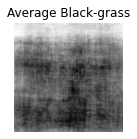

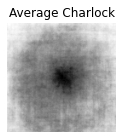

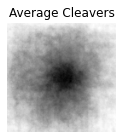

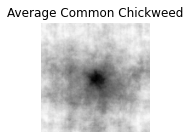

In [56]:
fig=plt.figure(figsize=(2,2))
label_0_data=get_data(0)
find_mean_img(label_0_data, classes[0])

label_1_data=get_data(1)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_1_data, classes[1])

label_2_data=get_data(2)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_2_data, classes[2])

label_3_data=get_data(3)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_3_data, classes[3])

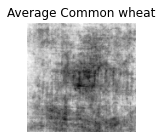

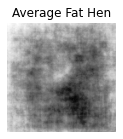

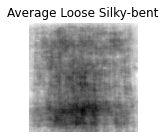

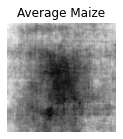

In [57]:
label_4_data=get_data(4)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_4_data, classes[4])

label_5_data=get_data(5)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_5_data, classes[5])

label_6_data=get_data(6)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_6_data, classes[6])

label_7_data=get_data(7)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_7_data, classes[7])

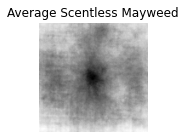

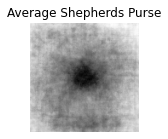

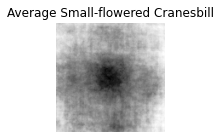

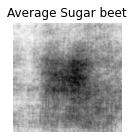

In [58]:
label_8_data=get_data(8)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_8_data, classes[8])

label_9_data=get_data(9)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_9_data, classes[9])

label_10_data=get_data(10)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_10_data, classes[10])

label_11_data=get_data(11)
fig=plt.figure(figsize=(2,2))
find_mean_img(label_11_data, classes[11])

### **Data Preprocessing** 
Create X features(Images) and y lables from the seedlings data, we shuffle it random so we will get mix of images 
As observed the quality of images are very poor and also sample distribution in not proper 


In [59]:
#Create X and y feature sets orgX is original image sets X is blurred normalize hsv sr
X = []
y = []
orgX =[]
np.random.shuffle(seedlings_data)
for features,label in seedlings_data:
#np.random.shuffle(grayhsv_data)
#for features,label in grayhsv_data:
    orgX.append(features[0])
    X.append(features[1])
    y.append(label)
X= np.array(X)
orgX = np.array(orgX)

# Normalizing pixel values  
X = X/255.0  
orgX = orgX/255.0
# image reshaping 
X = X.reshape(-1,128,128,3)
orgX = orgX.reshape(-1,128,128,3)
print(X.shape)
print(orgX.shape)

(4750, 128, 128, 3)
(4750, 128, 128, 3)


In [60]:
# Split the data into train and test data set 
seed=42
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=seed,stratify=y) 

In [61]:
#convert target to encoded categorical format 
encoded = to_categorical(np.array(y_train))
y_train_e=encoded
encoded_test = to_categorical(np.array(y_test))
y_test_e=encoded_test

In [62]:
print(X_train.shape)
print(X_test.shape)

(4275, 128, 128, 3)
(475, 128, 128, 3)


In [63]:
print(y_train_e.shape)
print(y_test_e.shape)

(4275, 12)
(475, 12)


### **Model Building** 

We will be using two types of Deep Neural Networks:

- **ANN** (Artificial Neural Network - fully connected)
- **CNN** (Convolutional Neural Network)

#### **ANN**

In [64]:
#Build the model
# 3 layers, 1 layer to flatten the image to a 28 x 28 = 784 vector
#           1 layer with 128 neurons and relu function
#           1 layer with 10 neurons and softmax function
#Create the neural network model
def create_model(): 
        model_ann = keras.Sequential([
            keras.layers.Flatten(input_shape=(128,128,3)),
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dropout(0.01),
            keras.layers.Dense(700,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dropout(0.01),
            keras.layers.Dense(12, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        #Compile the model
        #The loss function measures how well the model did on training , and then tries 
        #to improve on it using the optimizer
        model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model_ann

In [65]:
model_ann=create_model()
model_ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_3 (Dense)             (None, 500)               24576500  
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_4 (Dense)             (None, 700)               350700    
                                                                 
 dropout_3 (Dropout)         (None, 700)               0         
                                                                 
 dense_5 (Dense)             (None, 12)                8412      
                                                                 
Total params: 24,935,612
Trainable params: 24,935,612


In [66]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model_ann.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=200, #number of iterations over the entire dataset to train on
          batch_size=100,validation_split=0.2,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

Epoch 1/200
33/35 [===========================>..] - ETA: 0s - loss: 8.1587 - accuracy: 0.1167
Epoch 00001: val_accuracy improved from -inf to 0.10760, saving model to best_model.h5
35/35 [==============================] - 3s 76ms/step - loss: 7.9594 - accuracy: 0.1187 - val_loss: 2.4170 - val_accuracy: 0.1076
Epoch 2/200
33/35 [===========================>..] - ETA: 0s - loss: 2.2626 - accuracy: 0.2103
Epoch 00002: val_accuracy improved from 0.10760 to 0.24327, saving model to best_model.h5
35/35 [==============================] - 2s 55ms/step - loss: 2.2544 - accuracy: 0.2120 - val_loss: 2.1794 - val_accuracy: 0.2433
Epoch 3/200
34/35 [============================>.] - ETA: 0s - loss: 1.9708 - accuracy: 0.3297
Epoch 00003: val_accuracy improved from 0.24327 to 0.32164, saving model to best_model.h5
35/35 [==============================] - 3s 79ms/step - loss: 1.9704 - accuracy: 0.3304 - val_loss: 1.9129 - val_accuracy: 0.3216
Epoch 4/200
33/35 [===========================>..] - ETA: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


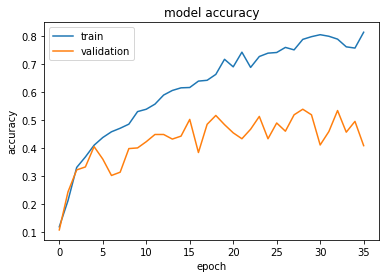

In [67]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [68]:
#Evaluate the model on test Data
model_ann.evaluate(X_test,y_test_e)

15/15 [==============================] - 0s 7ms/step - loss: 2.2295 - accuracy: 0.4189


[2.2295496463775635, 0.41894736886024475]

In [69]:
y_predict=model_ann.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)

In [70]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_predict)
cm

array([[ 4,  0,  0,  0,  1,  6,  6,  1,  1,  0,  0,  7],
       [ 0, 25,  2,  0,  0,  2,  0,  1,  6,  1,  1,  1],
       [ 0,  1, 20,  0,  1,  1,  0,  0,  6,  0,  0,  0],
       [ 0,  1,  1, 15,  0,  6,  0,  9, 27,  0,  1,  1],
       [ 0,  0,  0,  0, 13,  5,  0,  0,  3,  0,  0,  1],
       [ 0,  1,  0,  2,  5, 29,  2,  2,  3,  0,  1,  3],
       [ 4,  0,  1,  0,  7, 20, 20,  0,  7,  1,  0,  5],
       [ 0,  1,  0,  0,  0,  1,  0,  7, 13,  0,  0,  0],
       [ 1,  1,  1,  0,  1,  6,  2,  2, 38,  0,  0,  0],
       [ 0,  6,  3,  0,  0,  1,  0,  1, 11,  0,  1,  0],
       [ 0,  4,  1,  0,  1, 11,  0,  2,  3,  3, 25,  0],
       [ 1,  0,  0,  1,  3, 22,  1,  1,  6,  0,  0,  3]])

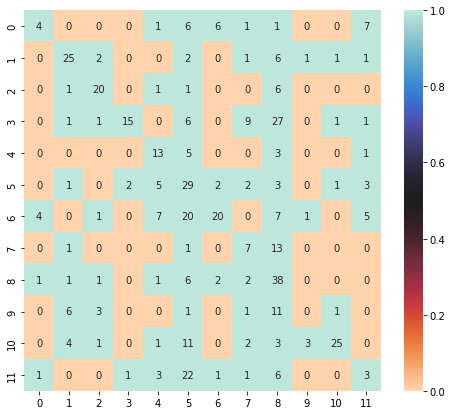

In [71]:
plt.figure(figsize=(8,7))
import seaborn as sns
sns.heatmap(cm, annot=True,vmin=0, vmax=1, cmap='icefire_r')
plt.show()

In [72]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.40      0.15      0.22        26
           1       0.62      0.64      0.63        39
           2       0.69      0.69      0.69        29
           3       0.83      0.25      0.38        61
           4       0.41      0.59      0.48        22
           5       0.26      0.60      0.37        48
           6       0.65      0.31      0.42        65
           7       0.27      0.32      0.29        22
           8       0.31      0.73      0.43        52
           9       0.00      0.00      0.00        23
          10       0.86      0.50      0.63        50
          11       0.14      0.08      0.10        38

    accuracy                           0.42       475
   macro avg       0.45      0.41      0.39       475
weighted avg       0.50      0.42      0.41       475



In [73]:
test_df=pd.DataFrame({"y_test": y_test,
              "y_predict": y_predict
})

In [74]:
test_df.head()

,y_test,y_predict
0,3,8
1,10,5
2,10,10
3,10,5
4,1,1


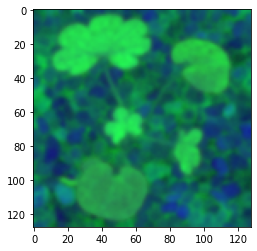

In [75]:
plt.imshow(X_test[3])
plt.show()

In [78]:
print(f'{classes[10]} - {classes[8]}')

Small-flowered Cranesbill - Scentless Mayweed


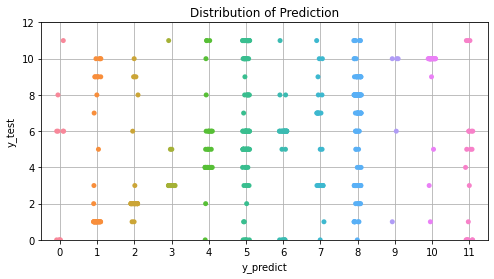

In [77]:
plt.figure(figsize=(8,4))
ax=sns.stripplot(data=test_df,y='y_test', x='y_predict', jitter=True)
plt.title("Distribution of Prediction")
plt.ylim(0,12)
plt.grid(True)

As we see here, the **ANN does not show a good test accuracy**, since ANNs are unable to capture correlation characteristics of the image. 

**Let's try Convolutional Neural Networks, which take in the whole image as a 2D matrix instead.**

In [82]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#
y_train=np.array(y_train)
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  


Epoch 1/30
54/54 [==============================] - ETA: 0s - loss: 2.4269 - accuracy: 0.1357
Epoch 00001: val_accuracy improved from -inf to 0.18012, saving model to best_model.h5
54/54 [==============================] - 23s 224ms/step - loss: 2.4269 - accuracy: 0.1357 - val_loss: 2.3763 - val_accuracy: 0.1801
Epoch 2/30
54/54 [==============================] - ETA: 0s - loss: 2.1903 - accuracy: 0.2474
Epoch 00002: val_accuracy improved from 0.18012 to 0.29240, saving model to best_model.h5
54/54 [==============================] - 8s 157ms/step - loss: 2.1903 - accuracy: 0.2474 - val_loss: 2.0014 - val_accuracy: 0.2924
Epoch 3/30
54/54 [==============================] - ETA: 0s - loss: 1.7653 - accuracy: 0.3807
Epoch 00003: val_accuracy improved from 0.29240 to 0.30175, saving model to best_model.h5
54/54 [==============================] - 8s 156ms/step - loss: 1.7653 - accuracy: 0.3807 - val_loss: 1.9056 - val_accuracy: 0.3018
Epoch 4/30
54/54 [==============================] - ETA: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


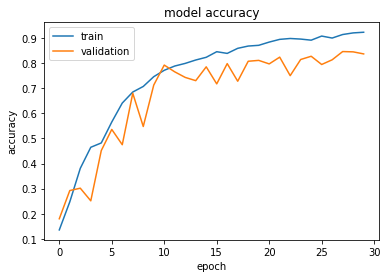

In [83]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [84]:
#Evaluate the model on test Data
model_ann.evaluate(X_test,y_test_e)

15/15 [==============================] - 0s 9ms/step - loss: 2.2295 - accuracy: 0.4189


[2.2295496463775635, 0.41894736886024475]

In [85]:
y_predict=model_ann.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)

In [86]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[ 4,  0,  0,  0,  1,  6,  6,  1,  1,  0,  0,  7],
       [ 0, 25,  2,  0,  0,  2,  0,  1,  6,  1,  1,  1],
       [ 0,  1, 20,  0,  1,  1,  0,  0,  6,  0,  0,  0],
       [ 0,  1,  1, 15,  0,  6,  0,  9, 27,  0,  1,  1],
       [ 0,  0,  0,  0, 13,  5,  0,  0,  3,  0,  0,  1],
       [ 0,  1,  0,  2,  5, 29,  2,  2,  3,  0,  1,  3],
       [ 4,  0,  1,  0,  7, 20, 20,  0,  7,  1,  0,  5],
       [ 0,  1,  0,  0,  0,  1,  0,  7, 13,  0,  0,  0],
       [ 1,  1,  1,  0,  1,  6,  2,  2, 38,  0,  0,  0],
       [ 0,  6,  3,  0,  0,  1,  0,  1, 11,  0,  1,  0],
       [ 0,  4,  1,  0,  1, 11,  0,  2,  3,  3, 25,  0],
       [ 1,  0,  0,  1,  3, 22,  1,  1,  6,  0,  0,  3]])

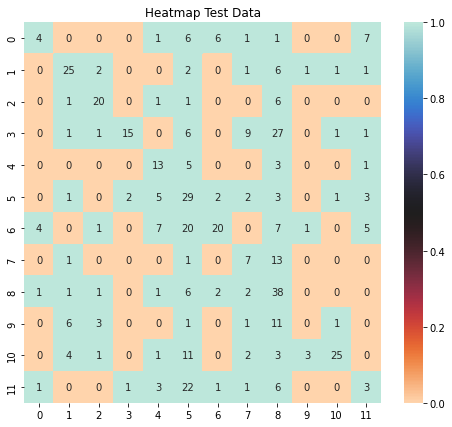

In [87]:
plt.figure(figsize=(8,7))
plt.title("Heatmap Test Data")
import seaborn as sns
sns.heatmap(cm, annot=True,vmin=0, vmax=1, cmap='icefire_r')
plt.show()

In [88]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.40      0.15      0.22        26
           1       0.62      0.64      0.63        39
           2       0.69      0.69      0.69        29
           3       0.83      0.25      0.38        61
           4       0.41      0.59      0.48        22
           5       0.26      0.60      0.37        48
           6       0.65      0.31      0.42        65
           7       0.27      0.32      0.29        22
           8       0.31      0.73      0.43        52
           9       0.00      0.00      0.00        23
          10       0.86      0.50      0.63        50
          11       0.14      0.08      0.10        38

    accuracy                           0.42       475
   macro avg       0.45      0.41      0.39       475
weighted avg       0.50      0.42      0.41       475



In [89]:
test_df=pd.DataFrame({"y_test": y_test,
              "y_predict": y_predict
})
test_df.head(5)

,y_test,y_predict
0,3,8
1,10,5
2,10,10
3,10,5
4,1,1


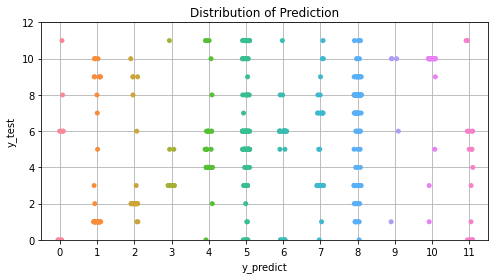

In [90]:
plt.figure(figsize=(8,4))
ax=sns.stripplot(data=test_df,y='y_test', x='y_predict', jitter=True)
plt.title("Distribution of Prediction")
plt.ylim(0,12)
plt.grid(True)